In [7]:
import pandas as pd
import requests
import zipfile
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import time


In [8]:
def plot_null_values(df):
    # Calculate the percentage of null values for each column
    null_percentage = (df.isnull().sum() / len(df)) * 100

    # Calculate the total number of null values for each column
    null_count = df.isnull().sum()

    # Create a DataFrame to store the results
    null_df = pd.DataFrame({'Null Count': null_count, 'Null Percentage': null_percentage})

    # Plot the bar chart
    fig, ax = plt.subplots(figsize=(10, 6))
    null_df.sort_values(by='Null Percentage', ascending=False, inplace=True)

    def percentage_formatter(x, pos):
        return f'{x:.2f}%'
    ax.yaxis.set_major_formatter(FuncFormatter(percentage_formatter))


    null_df.plot(kind='bar', y='Null Percentage', ax=ax, color='skyblue', legend=False)
    
    # Add labels and title
    ax.set_ylabel('Null Percentage')
    ax.set_xlabel('Columns')
    ax.set_title('Percentage of Null Values in Each Column')

    # Display the exact percentage values on top of the bars
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')


    plt.show()

In [9]:
# ingesting the station table data
url = "https://www.rideindego.com/wp-content/uploads/2023/10/indego-stations-2023-10-01.csv"
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}

# download the csv from the url above using the requests library and name it "station_table_10102023.csv" and then read it in as a CSV. put it in the "indego_data" directory
response = requests.get(url, headers=headers)
with open('indego_data/station_table_10102023.csv', 'wb') as f:
    f.write(response.content)

columns_to_keep = [
    'Station_ID',
    'Station_Name',
    'Day of Go_live_date',
    'Status'
]

column_dtypes = {
    'Station_ID': 'str',
    'Station_Name': 'str',
    'Day of Go_live_date': 'str',
    'Status': 'str'
}

station_table = pd.read_csv('indego_data/station_table_10102023.csv', usecols=columns_to_keep, dtype=column_dtypes)
station_table.head()

,Station_ID,Station_Name,Day of Go_live_date,Status
0,3000,Virtual Station,4/23/2015,Active
1,3004,Municipal Services Building Plaza,4/23/2015,Inactive
2,3005,"Welcome Park, NPS",4/23/2015,Active
3,3006,40th & Spruce,4/23/2015,Active
4,3007,"11th & Pine, Kahn Park",4/23/2015,Active


In [10]:
station_table.dtypes

Station_ID             object
Station_Name           object
Day of Go_live_date    object
Status                 object
dtype: object

In [11]:
subfolder = 'indego_data'
os.makedirs(subfolder, exist_ok=True)

url = 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/10/indego-trips-2023-q3.zip'
zip_folder = url.split('/')[-1]
print(zip_folder)

response = requests.get(url)

print(response.status_code)

with open(os.path.join(subfolder, 'indego-trips-2023-q3.zip'), 'wb') as f:
    f.write(response.content)

with zipfile.ZipFile(os.path.join(subfolder, 'indego-trips-2023-q3.zip'), 'r') as zip_ref:
    zip_ref.extractall(subfolder)

indego-trips-2023-q3.zip
200


In [13]:
# # zip folder (end of url) on indego site
# files = [
#     'indego-trips-2023-q3.zip',
#     'indego-trips-2023-q2.zip',
#     'indego-trips-2023-q1.zip',
#     'indego-trips-2022-q4.zip',
#     'indego-trips-2022-q3.zip',
#     'indego-trips-2022-q2.zip',
#     'indego-trips-2022-q1.zip',
#     'indego-trips-2021-q4.zip',
#     'indego-trips-2021-q3.zip',
#     'indego-trips-2021-q2.zip',
#     'indego-trips-2021-q1.zip',
#     'indego-trips-2020-q4.zip',
#     'indego-trips-2020-q3.zip',
#     'indego-trips-2020-q2.zip',
#     'indego-trips-2020-q1.zip',
#     'indego-trips-2019-q4.zip',
#     'indego-trips-2019-q3.zip',
#     'indego-trips-2019-q2.zip',
#     'indego-trips-2019-q1.zip',
#     'indego-trips-2018-q4.zip',
#     'indego-trips-2018-q3.zip',
#     'indego-trips-2018-q2.zip',
#     'indego-trips-2018-q1.zip'#,
#     # 'indego-trips-2017-q4.zip',
#     # 'indego-trips-2017-q3.zip'
# ]

# quarter_to_month_map = {
#     'q1': '04',
#     'q2': '07',
#     'q3': '10',
#     'q4': '01'
# }

In [14]:
# def get_quarter(text):
#     return text.split('-')[3][0:2]

# def get_year(text):
#     if get_quarter(text) == 'q4':
#         return str(int(text.split('-')[2]) + 1)
#     else:
#         return text.split('-')[2]

# # print(get_year('indego-trips-2020-q4.zip'))

# def get_month_for_url(text):
#     return quarter_to_month_map[text.split('-')[3][0:2]]

# def get_url(file):
#     base_url = 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/'
#     year = get_year(file)
#     month = get_month_for_url(file)
#     return f'{base_url}{year}/{month}/{file}'

In [15]:
def get_url_response(url):
    # headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/56.0.2924.76 Safari/537.36'}
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
    response = requests.get(url, headers=headers)
    return (response.status_code, response.content)

In [16]:
urls = [
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/10/indego-trips-2023-q3.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/07/indego-trips-2023-q2.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/04/indego-trips-2023-q1.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2023/01/indego-trips-2022-q4.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2022/12/indego-trips-2022-q3.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2022/07/indego-trips-2022-q2.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2022/04/indego-trips-2022-q1.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2022/01/indego-trips-2021-q4.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2021/10/indego-trips-2021-q3.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2021/07/indego-trips-2021-q2.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2021/04/indego-trips-2021-q1.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2021/01/indego-trips-2020-q4.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2020/10/indego-trips-2020-q3.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2020/08/indego-trips-2020-q2.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2020/04/indego-trips-2020-q1.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2020/01/indego-trips-2019-q4.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/10/indego-trips-2019-q3-1.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/07/indego-trips-2019-q2.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/04/indego-trips-2019-q1.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/01/indego-trips-2018-q4.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2019/01/indego-trips-2018-q3.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2018/09/indego-trips-2018-q2.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2018/04/indego-trips-2018-q1.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2018/01/indego-trips-2017-q4.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2015/12/indego-trips-2017-q3.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2017/07/indego_gbfs_trips_Q2_2017.csv.zip',
    'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2017/04/indego_gbfs_trips_Q1_2017.zip'
    # 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2017/01/Indego_trips_Q4_2016.zip',
    # 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/10/Q3_2016_trips.zip',
    # 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/07/Indego_Trips_2016Q2.zip',
    # 'https://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/07/Indego_Trips_2016Q1.zip',
    # 'http://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/01/Indego_Trips_2015Q4.zip',
    # 'http://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/01/Indego_Trips_2015Q3.zip',
    # 'http://bicycletransit.wpenginepowered.com/wp-content/uploads/2016/01/Indego_Trips_2015Q2.zip'
]

In [17]:
def download_zip(folder_path, url):
    os.makedirs(folder_path, exist_ok=True)
    # headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"}
    # response = requests.get(url)
    r = get_url_response(url)
    response_status_code = r[0]
    response_content = r[1]
    zip_name = url.split('/')[-1]
    print(zip_name + f'...{response_status_code}' )
    with open(os.path.join(folder_path, zip_name), 'wb') as f:
        f.write(response_content)
    return response_status_code

In [18]:
def unzip_file(csv_folder, zip_file_path):
    # with zipfile.ZipFile(os.path.join(folder_path, zip_file), 'r') as zip_ref:
    with zipfile.ZipFile(os.path.join(zip_file_path), 'r') as zip_ref:
        all_files = zip_ref.namelist()
        files_to_extract = [file for file in all_files if "stations" not in file.lower()]
        for file in files_to_extract:
            zip_ref.extract(file, csv_folder)

        # zip_ref.extractall(csv_folder)

In [19]:
zip_folder_path = 'indego_data/zips'
for url in urls:
    download_zip(zip_folder_path, url)
    # time.sleep(2)

indego-trips-2023-q3.zip...200
indego-trips-2023-q2.zip...200
indego-trips-2023-q1.zip...200
indego-trips-2022-q4.zip...200
indego-trips-2022-q3.zip...200
indego-trips-2022-q2.zip...200
indego-trips-2022-q1.zip...200
indego-trips-2021-q4.zip...200
indego-trips-2021-q3.zip...200
indego-trips-2021-q2.zip...200
indego-trips-2021-q1.zip...200
indego-trips-2020-q4.zip...200
indego-trips-2020-q3.zip...200
indego-trips-2020-q2.zip...200
indego-trips-2020-q1.csv.zip...200
indego-trips-2019-q4.csv.zip...200
indego-trips-2019-q3-1.zip...200
indego-trips-2019-q2.csv.zip...200
indego-trips-2019-q1.csv.zip...200
indego-trips-2018-q4.csv.zip...200
indego-trips-2018-q3.csv.zip...200
indego-trips-2018-q2.csv.zip...200
indego-trips-2018-q1.csv.zip...200
indego-trips-2017-q4.csv.zip...200
indego-trips-2017-q3.csv.zip...200
indego_gbfs_trips_Q2_2017.csv.zip...200
indego_gbfs_trips_Q1_2017.zip...200


In [20]:
# get list of files in the zips folder
zips_folder = 'indego_data/zips'
zips = os.listdir(zip_folder_path)

raw_folder_path = 'indego_data/raw_data'
for zip_file in zips:
    zip_path = os.path.join(zips_folder, zip_file)
    print(zip_file)
    unzip_file(raw_folder_path , zip_path)
    print('...success')

indego-trips-2018-q1.csv.zip
...success
indego-trips-2021-q4.zip
...success
indego-trips-2019-q2.csv.zip
...success
indego-trips-2018-q2.csv.zip
...success
indego-trips-2023-q3.zip
...success
indego-trips-2021-q3.zip
...success
indego-trips-2021-q2.zip
...success
indego-trips-2022-q4.zip
...success
indego-trips-2017-q4.csv.zip
...success
indego-trips-2020-q3.zip
...success
indego-trips-2019-q4.csv.zip
...success
indego-trips-2023-q2.zip
...success
indego-trips-2018-q4.csv.zip
...success
indego_gbfs_trips_Q1_2017.zip
...success
indego-trips-2020-q2.zip
...success
indego-trips-2022-q2.zip
...success
indego-trips-2021-q1.zip
...success
indego-trips-2017-q3.csv.zip
...success
indego-trips-2022-q3.zip
...success
indego_gbfs_trips_Q2_2017.csv.zip
...success
indego-trips-2019-q3-1.zip
...success
indego-trips-2020-q1.csv.zip
...success
indego-trips-2020-q4.zip
...success
indego-trips-2018-q3.csv.zip
...success
indego-trips-2022-q1.zip
...success
indego-trips-2019-q1.csv.zip
...success
indego-t

Refer to the indego site for data formatting. Going to pass the dtypes specified here to reading in the CSV

https://www.rideindego.com/about/data/

In [24]:
column_types = {
    'trip_id': 'int64',                 # this should be unique, would be good to add a check to make sure later
    'duration': 'int64',                # length of trip in minutes
    # 'start_time': 'datetime64',         # start time of trip
    # 'end_time': 'datetime64',           # end time of trip
    'start_station': 'string',           # station ID where the trip originated
    'start_lat': 'float64',             # latitude of station where trip originated
    'start_lon': 'float64',             # longitude of station where trip originated
    'end_station': 'string',             # station ID where the trip terminated
    'end_lat': 'float64',               # latitude of station where trip terminated
    'end_lon': 'float64',               # longitude of station where trip terminated
    'bike_id': 'string',                 # locally unique integer that identifies the bike
    'plan_duration': 'string',           # length of plan the passholder is using (0 = walk-up)
    'trip_route_category': 'string',  # "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips (check for others)
    'passholder_type': 'string',      # "Indego30", "Indego365", "IndegoFlex", or "Walk-up"
    'bike_type': 'string'             # "electric bike" or "classic bike"
}

In [27]:
date_format = '%m/%d/%Y %H:%M'

In [28]:
# list of csv files in the raw_data folder
csv_folder = os.listdir('indego_data/raw_data')
csv_folder_path = 'indego_data/raw_data'
csv_files = [file for file in csv_folder if file.endswith(".csv")]
# print(csv_files)
# read in each file into a dictionary of dataframes. the key should be the file name
dfs = {}
for file in csv_files:
    print(file)
    file_path = os.path.join(csv_folder_path, file)
    df = pd.read_csv(
        file_path, 
        dtype=column_types,
        parse_dates=['start_time', 'end_time'],
        date_format=date_format
        )
    dfs[file] = df
    print('...success')

indego-trips-2021-q1.csv
...success
indego-trips-2021-q3.csv
...success
indego-trips-2017-q3.csv
...success
indego-trips-2022-q3.csv
...success
indego-trips-2018-q3.csv
...success
indego-trips-2021-q2.csv
...success
indego-trips-2021-q4.csv
...success
indego-trips-2023-q3-2.csv
...success
indego-trips-2020-q1.csv
...success
indego_gbfs_trips_Q2_2017.csv
...success
indego-trips-2018-q2.csv
...success
indego-trips-2023-q1.csv
...success
indego-trips-2020-q4.csv
...success
indego-trips-2018-q1.csv
...success
indego-quarter-echo.bicycletransit.com-2018-01-19-9-57 AM.csv
...success
indego-trips-2022-q2.csv
...success
indego-trips-2020-q3.csv
...success
indego-trips-2020-q2.csv
...success
indego-trips-2019-q2.csv
...success
indego-trips-2019-q1.csv
...success
indego-trips-2022-q4.csv
...success
indego-trips-2022-q1.csv
...success
indego-trips-2023-q2.csv
...success
indego-trips-2019-q3.csv
...success
indego-trips-2018-q4.csv
...success
indego-trips-2019-q4.csv
...success
indego_gbfs_trips_Q1

In [29]:
dfs

{'indego-trips-2021-q1.csv':          trip_id  duration          start_time            end_time  \
 0      365184634        15 2021-01-01 00:05:00 2021-01-01 00:20:00   
 1      365184633        14 2021-01-01 00:06:00 2021-01-01 00:20:00   
 2      365184632        33 2021-01-01 00:07:00 2021-01-01 00:40:00   
 3      365184631         9 2021-01-01 00:13:00 2021-01-01 00:22:00   
 4      365184630        13 2021-01-01 00:37:00 2021-01-01 00:50:00   
 ...          ...       ...                 ...                 ...   
 96276  373582030         6 2021-03-31 23:43:00 2021-03-31 23:49:00   
 96277  373582029        13 2021-03-31 23:45:00 2021-03-31 23:58:00   
 96278  373582028         9 2021-03-31 23:46:00 2021-03-31 23:55:00   
 96279  373582027         5 2021-03-31 23:51:00 2021-03-31 23:56:00   
 96280  373609336       416 2021-03-31 23:52:00 2021-04-01 06:48:00   
 
       start_station  start_lat  start_lon end_station    end_lat    end_lon  \
 0              3125  39.943909 -75.16

In [ ]:
df = pd.read_csv('indego_data/indego-trips-2023-q3-2.csv',
                 dtype=column_types,
                 parse_dates=['start_time', 'end_time'],
                 date_format=date_format
                 )

In [ ]:
df.head()

In [ ]:
# need to add checks for each column and see where there are errors in the data
# trip_id: check for uniqueness
# duration: add check based on difference between start_time and end_time
# start_time: check for nulls, check for date format, check that it is before end_time
# end_time: check for nulls, check for date format, check that it is after start_time
# start_station: check for nulls, check that it is in the station list
# start_lat: check for nulls, check for invalid latitude, check that it is in the station list, 
# start_lon: check for nulls, check for invalid longitude, check that it is in the station list
# end_station: check for nulls, check that it is in the station list
# end_lat: check for nulls, check for invalid latitude, check that it is in the station list
# end_lon: check for nulls, check for invalid longitude, check that it is in the station list
# bike_id: check for nulls, check that it is in the bike list
# plan_duration: check for nulls
# trip_route_category: check for nulls, check that it is in the list of valid trip routes
# passholder_type: check for nulls, check that it is in the list of valid passholder types
# bike_type: check for nulls, check that it is in the list of valid bike types

In [ ]:
plot_null_values(df)

In [ ]:
def null_mode(df):
    df_null = df[df.isnull().any(axis=1)]
    most_common_values = df_null.mode().iloc[0]
    most_common_frequency = df_null.apply(lambda col: col.value_counts().get(most_common_values[col.name], 0))
    mode_percentages = most_common_frequency / len(df_null) * 100
    result_df = pd.DataFrame({'Mode': most_common_values, 'Percentage': mode_percentages})
    return result_df.sort_values(by='Percentage', ascending=False)

In [ ]:
null_mode(df)

I am going to remove all start_station and end_station equal to 3000 since that is a virtual station and accounts for all of the null values. This is not important for the analysis.

In [ ]:
df_no_virtual = df[(df['end_station'] != '3000') & (df['start_station'] != '3000')]

In [ ]:
plot_null_values(df_no_virtual)

In [ ]:
# check to see if trip_id is unique
df_no_virtual['trip_id'].is_unique

Exploring the Data

In [ ]:
# merging the station table with the trip table
# add the name of the start and end stations to the trips table
df_no_virtual = df_no_virtual.merge(station_table[['Station_ID', 'Station_Name']], how='left', left_on='start_station', right_on='Station_ID')
df_no_virtual = df_no_virtual.rename(columns={'Station_Name': 'start_station_name'})

df_no_virtual = df_no_virtual.merge(station_table, how='left', left_on='end_station', right_on='Station_ID')
df_no_virtual = df_no_virtual.rename(columns={'Station_Name': 'end_station_name'})

df_no_virtual.drop(columns=['Station_ID_x', 'Station_ID_y'], inplace=True)
df_no_virtual.head()

In [ ]:
# create a dataframe that has three columns: start_date, trip count
# group by start_date and count the number of trips
# sort by start_date
# rename columns



In [ ]:
# merge the station table with the trip table to get the latitude and longitude of the stations
station_table_with_coordinates = station_table.merge(
    df_no_virtual[['start_station', 'start_lat', 'start_lon']].drop_duplicates(),
    how='left', 
    left_on='Station_ID', 
    right_on='start_station'
    )

station_table_with_coordinates = station_table_with_coordinates.rename(columns={'start_lat': 'station_lat', 'start_lon': 'station_lon'})

station_table_with_coordinates.drop(columns=['start_station'], inplace=True)

station_table_with_coordinates = station_table.merge(
    df_no_virtual[['end_station', 'end_lat', 'end_lon']].drop_duplicates(),
    how='left', 
    left_on='Station_ID', 
    right_on='end_station'
    )

station_table_with_coordinates = station_table_with_coordinates.rename(columns={'end_lat': 'station_lat', 'end_lon': 'station_lon'})

station_table_with_coordinates.drop(columns=['end_station'], inplace=True)

station_table_with_coordinates

In [ ]:
# plot the stations on a maptlotlib basic plot
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(station_table_with_coordinates['station_lon'], station_table_with_coordinates['station_lat'], s=5)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Indego Stations')
plt.show()


In [ ]:
# plot the unique start station ids by latitude and longitude
# df_no_virtual.groupby(['start_station', 'start_lat', 'start_lon']).size().reset_index().rename(columns={0: 'count'}).plot(kind='scatter', x='start_lon', y='start_lat', figsize=(10, 10), alpha=0.5)

In [ ]:
# create a function that takes a station id as an input, and prints a plot showing the origin point and unique end points of all the trips originating from that station

def plot_station(station_id, df):
    station_df = df[df['start_station'] == station_id][['start_station', 'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon']]
    # remove duplicates from station_df
    station_df.drop_duplicates(inplace=True)
    # plot a line from the start location to the end locations
    plt.scatter(station_df['start_lon'], station_df['start_lat'], c='blue', label='Start Location')
    plt.scatter(station_df['end_lon'], station_df['end_lat'], c='red', label='End Location')

    for i in range
    plt.show()

In [ ]:
plot_station('3020', df_no_virtual)

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


DatetimeIndex(['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04',
               '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08',
               '2023-01-09', '2023-01-10',
               ...
               '2023-12-22', '2023-12-23', '2023-12-24', '2023-12-25',
               '2023-12-26', '2023-12-27', '2023-12-28', '2023-12-29',
               '2023-12-30', '2023-12-31'],
              dtype='datetime64[ns]', length=365, freq='D')
2023-01-01    0.611325
2023-01-02    0.065965
2023-01-03    2.746817
2023-01-04   -1.160877
2023-01-05    1.833956
                ...   
2023-12-27   -0.720739
2023-12-28   -2.607870
2023-12-29    2.661427
2023-12-30    1.907933
2023-12-31    0.820630
Freq: D, Length: 365, dtype: float64


findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


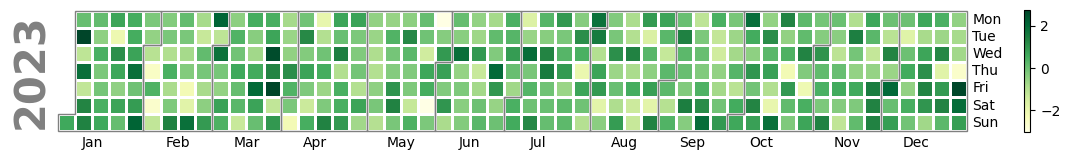

In [30]:
import calplot


# Create some data
data = np.random.randint(0, 52, (7, 52))
# create a numpy series of dates from jan 1 2023 through dec 31 2023
dates = pd.date_range('2023-01-01', periods=365, freq='D')
print(dates)
values = pd.Series(np.random.randn(len(dates)), index = dates)

print(values)

calplot.calplot(values, cmap='YlGn')
plt.show()

In [ ]:
# take df_no_virtual and group by start_time and count the number of trips for each day. make it into a pandas series with the index being the date and the value being the number of trips
# create a numpy array of the values
# create a numpy array of the dates
# use calplot to plot the calendar
# https://calplot.readthedocs.io/en/latest/

# create a dataframe that has three columns: start_date, trip count
# group by start_date and count the number of trips
# sort by start_date
# rename columns
trip_count_by_date = df_no_virtual.groupby('start_time').size().reset_index().rename(columns={0: 'count'})
trip_count_by_date.head()
# convert start_time to a day only
trip_count_by_date['date'] = pd.to_datetime(trip_count_by_date['start_time'], yearfirst=True)
# trip_count_by_date.rename(columns={'start_time': 'date'}, inplace=True)
trip_count_by_date.set_index('date', inplace=True)
trip_count_by_date['trip_count'] = 1

col = 'trip_count'
calplot.calplot(trip_count_by_date[col], 
                cmap='coolwarm',
                # vmin = min(trip_count_by_date[col]),
                # vmax = max(trip_count_by_date[col]),
                dayticks = True,
                figsize=(20, 20)
                )

In [31]:
trip_count_by_date = df_no_virtual[df_no_virtual['start_station'] == '3020'].groupby('start_time').size().reset_index().rename(columns={0: 'count'})
trip_count_by_date.head()
# convert start_time to a day only
trip_count_by_date['date'] = pd.to_datetime(trip_count_by_date['start_time'], yearfirst=True)
# trip_count_by_date.rename(columns={'start_time': 'date'}, inplace=True)
trip_count_by_date.set_index('date', inplace=True)
trip_count_by_date['trip_count'] = 1

col = 'trip_count'
calplot.calplot(trip_count_by_date[col], 
                cmap='coolwarm',
                # vmin = min(trip_count_by_date[col]),
                # vmax = max(trip_count_by_date[col]),
                dayticks = True,
                figsize=(20, 20)
                )

NameError: name 'df_no_virtual' is not defined